In [7]:
# import easyocr
# import cv2
# import matplotlib.pyplot as plt

# # 1. Set the path of your handwritten image
# image_path = 'image.jpg'  # <-- replace with your filename

# # 2. Load the image
# image = cv2.imread(image_path)

# # 3. Show the image (optional)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title("Input Image")
# plt.axis('off')
# plt.show()

# # 4. Initialize EasyOCR reader
# reader = easyocr.Reader(['en'])  # 'en' for English

# # 5. Perform OCR
# results = reader.readtext(image)

# # 6. Print the recognized text
# print("🔍 Recognized Handwritten Text:\n")
# for bbox, text, prob in results:
#     print(f"{text} (Confidence: {prob:.2f})")

✅ Image loaded successfully.



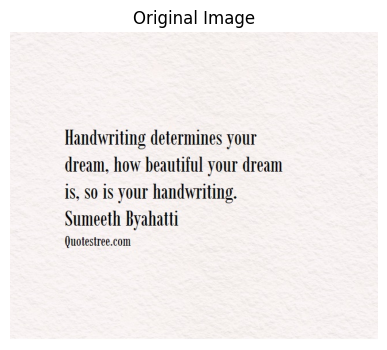

🔍 OCR Result WITHOUT preprocessing (raw image):

Handwriting determines your
dream, how beautiful your dream
is, so is your handwriting.
Sumeeth Byahatti

Quotestree.com

🔍 OCR Result WITH basic preprocessing (thresholding):



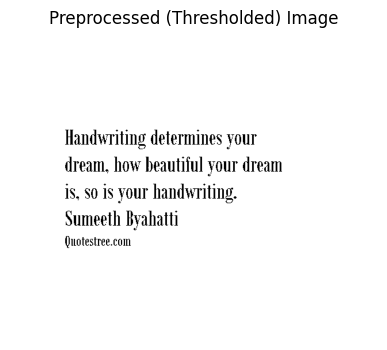

Using CPU. Note: This module is much faster with a GPU.


Handwriting determines your
dream, how beautiful your dream
is, so is your handwriting.
Sumeeth Byahatti

Quotestree.com

🧠 Trying EasyOCR (better for handwriting):



c:\Users\Krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Handwriting determines YOur (Confidence: 0.38)
dream; how beautiful your dream (Confidence: 0.81)
is, So is your handwriting (Confidence: 0.37)
Sumeeth Byahatti (Confidence: 0.99)
Quotestree.com (Confidence: 0.67)


In [11]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import easyocr

# ✅ Tesseract Executable Path (Update if needed)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# ✅ Load Image
image_path = 'handwriting quotes.jpg'
image = cv2.imread(image_path)

if image is None:
    print("❌ Image not found. Check the file name and path.")
    exit()

print("✅ Image loaded successfully.\n")

# ✅ Show Original Image
plt.figure(figsize=(6, 4))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()

# ✅ Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ✅ Try OCR without preprocessing
print("🔍 OCR Result WITHOUT preprocessing (raw image):\n")
raw_text = pytesseract.image_to_string(image, config='--oem 3 --psm 6', lang='eng')
print(raw_text.strip() if raw_text.strip() else "⚠️ No text recognized.")

# ✅ Try OCR with basic preprocessing (optional thresholding)
print("\n🔍 OCR Result WITH basic preprocessing (thresholding):\n")
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Show preprocessed image
plt.figure(figsize=(6, 4))
plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed (Thresholded) Image")
plt.axis('off')
plt.show()

processed_text = pytesseract.image_to_string(thresh, config='--oem 3 --psm 6', lang='eng')
print(processed_text.strip() if processed_text.strip() else "⚠️ No text recognized.")

# ✅ EasyOCR as fallback
print("\n🧠 Trying EasyOCR (better for handwriting):\n")
reader = easyocr.Reader(['en'], gpu=False)
results = reader.readtext(image)

if results:
    for bbox, text, conf in results:
        print(f"{text} (Confidence: {conf:.2f})")
else:
    print("⚠️ EasyOCR also couldn't detect text.")
